## Load APIs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

## Cancer Data

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(f'Shape of cancer dataset: {cancer.data.shape}')

Shape of cancer dataset: (569, 30)


In [6]:
print(f'Target classes:\n{
    {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}}')

Target classes:
{'malignant': 212, 'benign': 357}


In [7]:
print(f'Feature names:\n{cancer.feature_names}')

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Pair Plot

In [8]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

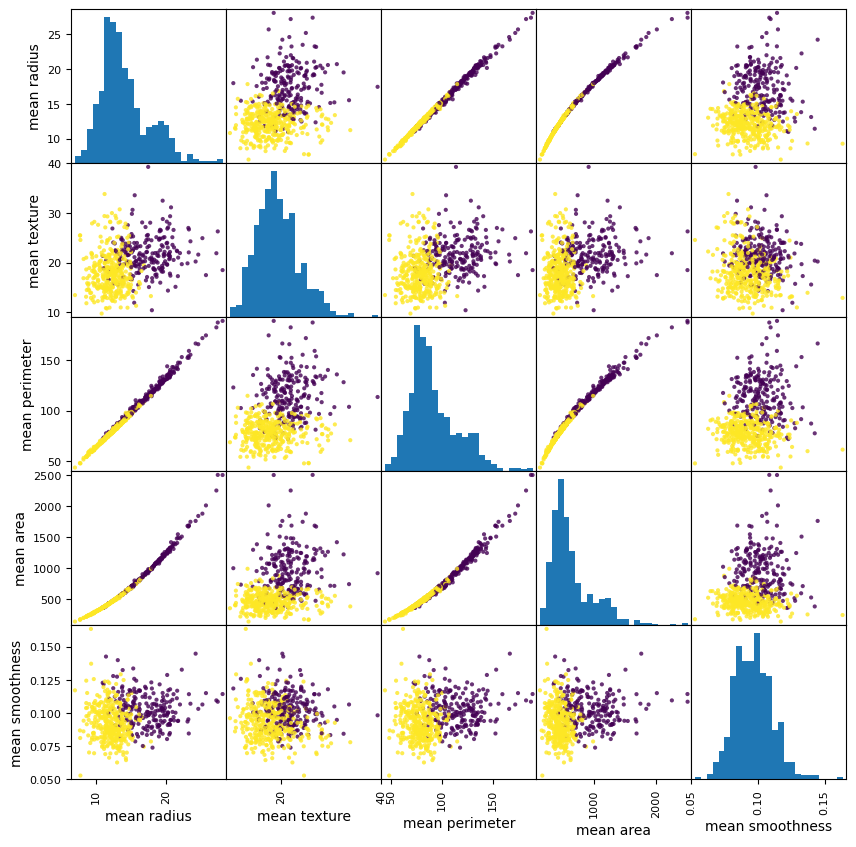

In [9]:
matrix = pd.plotting.scatter_matrix(cancer_df.iloc[:,0:5], c=cancer['target'], diagonal='hist', hist_kwds={'bins':25}, figsize=(10,10), alpha=0.8)

## KNN Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
training_accuracy = []
test_accuracy = []
neighbors_param = range(1,11)

In [11]:
for n_neighbors in neighbors_param:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

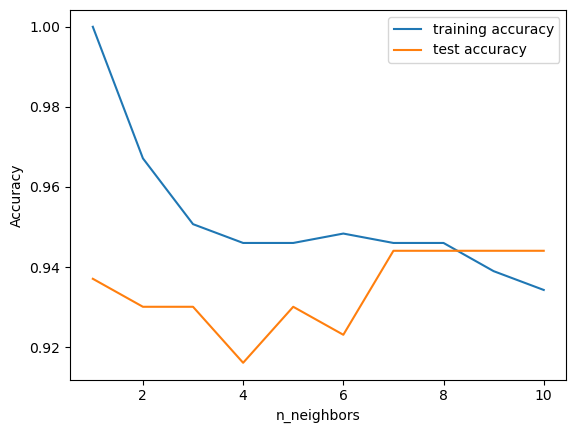

In [12]:
plt.plot(neighbors_param, training_accuracy, label='training accuracy')
plt.plot(neighbors_param, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

we observe peak at n_neighbors=6.

In [13]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)
print(f'Training set score: {knn6.score(X_train, y_train):.2f}')
print(f'Test set score: {knn6.score(X_test, y_test):.2f}')

Training set score: 0.95
Test set score: 0.92


## Linear Models

plotting a line given slope and intercept


In [14]:
x = np.linspace(-50,100,10)
slope = 0.5
intercept = 10
y = slope * x + intercept

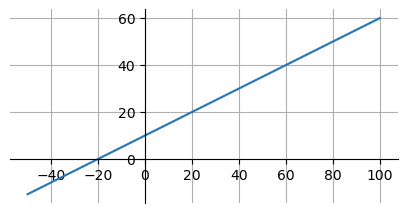

In [15]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.plot(x, y)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid(True)
ax.set_aspect('equal')


## Linear Classifiers

In [16]:
X_pair = X_train[:,[7,9]]
padding = 0.005
h = 0.001
x1_min, x1_max = X_pair[:,0].min()-padding, X_pair[:,0].max()+padding
x2_min, x2_max = X_pair[:,1].min()-padding, X_pair[:,1].max()+padding
print(x1_min, x1_max, x2_min, x2_max)
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))
print(f'xx shape: {xx.shape},\nyy shape: {yy.shape}')
grid = np.c_[xx.ravel(), yy.ravel()]
print(f'Grid shape: {grid.shape}')

-0.005 0.1963 0.04496 0.10244
xx shape: (58, 202),
yy shape: (58, 202)
Grid shape: (11716, 2)


In [17]:
logr = LogisticRegression().fit(X_pair, y_train)
svm = LinearSVC().fit(X_pair, y_train)

In [18]:
Z_logr = logr.predict(grid).reshape(xx.shape)
Z_svm = svm.predict(grid).reshape(xx.shape)

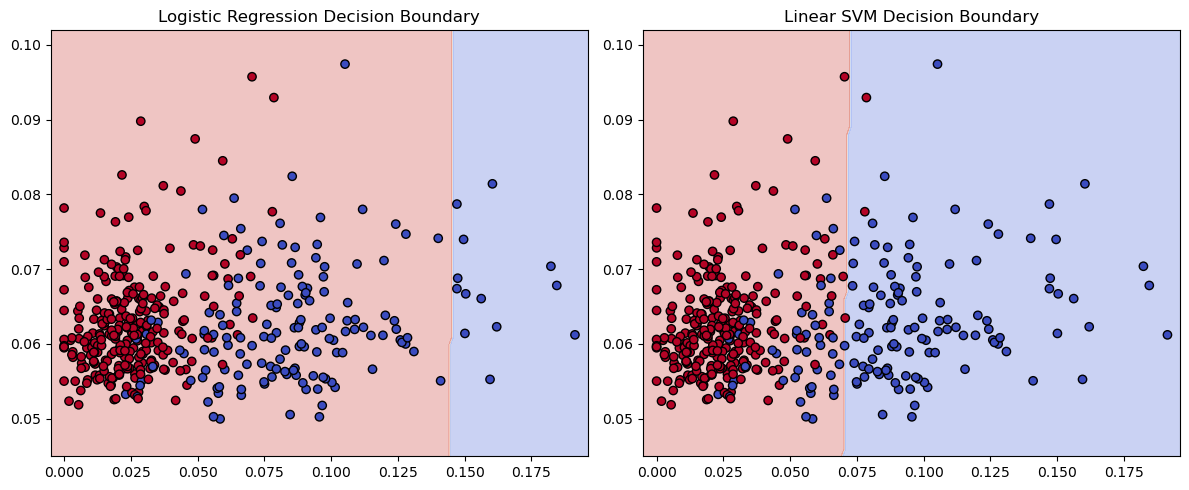

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_logr, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
# plt.xlim(x1_min, x1_max)
# plt.ylim(x2_min, x2_max)
plt.title('Logistic Regression Decision Boundary')

# SVM
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
# plt.xlim(x1_min, x1_max)
# plt.ylim(x2_min, x2_max)
plt.title('Linear SVM Decision Boundary')

plt.tight_layout()
plt.show()